# ==============================================================================
# Import Required Libraries
# ==============================================================================

This section of the code is primarily focused on importing necessary libraries and tools that will be used throughout the analysis. The libraries suggest that the code will involve data manipulation, visualization, possibly creating a PDF report, image processing, and use of regular expressions.

In [1]:
import pandas as pd
import re
import numpy as np
from fpdf import FPDF
from PIL import Image
import matplotlib.pyplot as plt

Pandas is a fundamental package for data analysis in Python. It provides tools for data manipulation and analysis tasks such as reading from and writing to different data formats, filtering, grouping, and aggregating data, etc. DataFrames and Series are the two primary data structures in Pandas.

Matplotlib is a 2D plotting library in Python. The pyplot module provides a MATLAB-like interface for creating visualizations like line plots, scatter plots, histograms, and more.
from fpdf import FPDF:

FPDF is a library that allows for the generation of PDF files. This suggests that the code might have a section where results or visuals are compiled into a PDF report.
from PIL import Image:

PIL (or its fork, Pillow) is a library for opening, manipulating, and saving many different image file formats. This implies that the code may involve some image processing or manipulation tasks.
import re:

The re module provides support for regular expressions in Python. Regular expressions are sequences of characters that define a search pattern. They're commonly used for string matching and manipulation.
import numpy as np:

Numpy is a library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a large collection of mathematical functions to operate on these arrays.


# ==============================================================================
# Data Preparation and Basic Analysis
# ==============================================================================

This section of the code is focused on data preparation: Loading the data from a CSV file. Converting the 'Date' column to a datetime format for easier manipulation. Filtering the data to consider only records from FY 2021 onwards. Calculating a new column 'Duration of Stay' based on the 'Leaving DOT' column.

In [3]:
# Load the dataset
data = pd.read_csv('') # input path to csv file


Purpose: This line reads a CSV file located at the given path into a Pandas DataFrame named data.
Explanation: DataFrames are two-dimensional, size-mutable, and can contain data of various types. It's a primary data structure in pandas used for storing and manipulating tabular data (data with rows and columns).

In [4]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])


Purpose: Converts the 'Date' column of the data DataFrame into a datetime format.
Explanation: By default, dates might be read from CSV files as strings. Converting them to datetime objects allows for easier date-based operations and comparisons. The pd.to_datetime() function is used to achieve this.

In [5]:
# Filter courses from FY 2021 onwards
filtered_data = data[data['Date'] >= '2020-10-01'].copy()
#filtered_data = data[data['Date'] >= '2020-10-01']

filtered_data.loc[:, 'Duration of Stay'] = filtered_data['Leaving DOT'] - 1


Purpose: Calculates the 'Duration of Stay' for each row in the filtered_data DataFrame by subtracting 1 from the 'Leaving DOT' column and stores the result in a new column called 'Duration of Stay'.
Explanation: The use of .loc[] allows for the selection of data by label. Here, all rows are selected (:) and a new column 'Duration of Stay' is created. The subtraction might be done to adjust the 'Leaving DOT' value to a zero-based index or some other domain-specific reason.

# ------------------------------------------------------------------------------
# Extract Relevant Data and Compute Attrition Rates
# ------------------------------------------------------------------------------

This section of the code focuses on analyzing attrition rates:
Data is grouped by the '4 Digit Course Number'.
The total number of trainees and the number of non-graduates are computed for each course.
Attrition rates are calculated for each course.
The mean attrition rate is calculated for morning vs. afternoon WCD sessions.

In [6]:
# Group by course number and calculate attrition rate
course_group = filtered_data.groupby('4 Digit Course Number')
total_trainees = course_group.size()
non_graduates = course_group.apply(lambda x: sum(x['Reason for leaving course'] != 'Graduated'))
attrition_rate = (non_graduates / total_trainees) * 100

In [7]:
# Determine time of day for WCD for each course based on the date
time_of_day = filtered_data.groupby('4 Digit Course Number')['Date'].min().apply(lambda x: 'Afternoon' if x < pd.Timestamp('2022-09-29') else 'Morning')

# Average attrition rate for Afternoon vs. Morning WCD sessions
mean_attrition_by_time = attrition_rate.groupby(time_of_day).mean()

mean_attrition_by_time.head()

Date
Afternoon    21.303322
Morning      30.264069
dtype: float64

# ------------------------------------------------------------------------------
# Statistical Analysis
# ------------------------------------------------------------------------------

This section of the code focuses on statistical testing:

It imports the necessary function for performing an independent two-sample t-test.
Attrition rates for afternoon and morning WCD sessions are separated.
A t-test is conducted to see if there's a statistically significant difference in attrition rates between the two times of day.
The t-statistic and p-value from the test are displayed, which will inform us about the significance of the observed differences.

In [8]:
from scipy.stats import ttest_ind
afternoon_rates = attrition_rate[time_of_day == 'Afternoon']
morning_rates = attrition_rate[time_of_day == 'Morning']
t_stat, p_value = ttest_ind(afternoon_rates, morning_rates)

t_stat, p_value

(-2.207290646997773, 0.04751101272918773)

The t-statistic value of -2.207 suggests that there's a difference between the means of the two groups being compared (afternoon and morning WCD sessions).
The negative sign indicates that the mean of the first group (afternoon sessions) is lower than the mean of the second group (morning sessions).

The p-value is a measure of the evidence against a null hypothesis. In the context of the t-test, the null hypothesis typically states that there's no difference between the means of the two groups.

A p-value of 0.0475 is slightly below the commonly used threshold of 0.05. This suggests that the observed difference between the attrition rates of the afternoon and morning WCD sessions is statistically significant at a 5% significance level.

In simpler terms, there's a 4.75% chance that the observed differences in attrition rates happened by random chance alone. Given that this probability is low (less than 5%), we would reject the null hypothesis and conclude that there is a statistically significant difference in attrition rates between the two times of day.

The analysis suggests that there is a statistically significant difference in attrition rates between the afternoon and morning WCD sessions. Specifically, the afternoon sessions have a lower attrition rate compared to the morning sessions. This result is important for decision-making regarding the scheduling of WCD sessions.

# ------------------------------------------------------------------------------
# Color Definitions
# ------------------------------------------------------------------------------

This section is primarily for aesthetics. By defining colors as constants with descriptive names, it makes the code more readable and maintainable. Instead of repeatedly using hexadecimal values throughout the code, the descriptive constant names can be used, making it clear which color is being referenced and ensuring consistency in the visualizations.

In [9]:
COLOR_NAVY_BLUE = '#001F3F'
COLOR_DARK_GREY = '#3D3D3D'
COLOR_STEEL_BLUE = '#357ABD'
COLOR_GREY = '#AAAAAA'
COLOR_GOLD = '#FFD700'
COLOR_MILITARY_GREEN = '#4B5320'

# ==============================================================================
# 0. Attrition Rates
# ==============================================================================

The bar chart visualizes the average attrition rates for "Afternoon" vs. "Morning" WCD sessions. Here's a hypothetical interpretation based on a typical visualization like this:

The height of each bar represents the average attrition rate for the respective time of day.
By comparing the heights, we can determine which time of day has a higher average attrition rate.
If, for example, the "Morning" bar is taller than the "Afternoon" bar, it would suggest that the average attrition rate is higher for morning WCD sessions compared to afternoon ones.

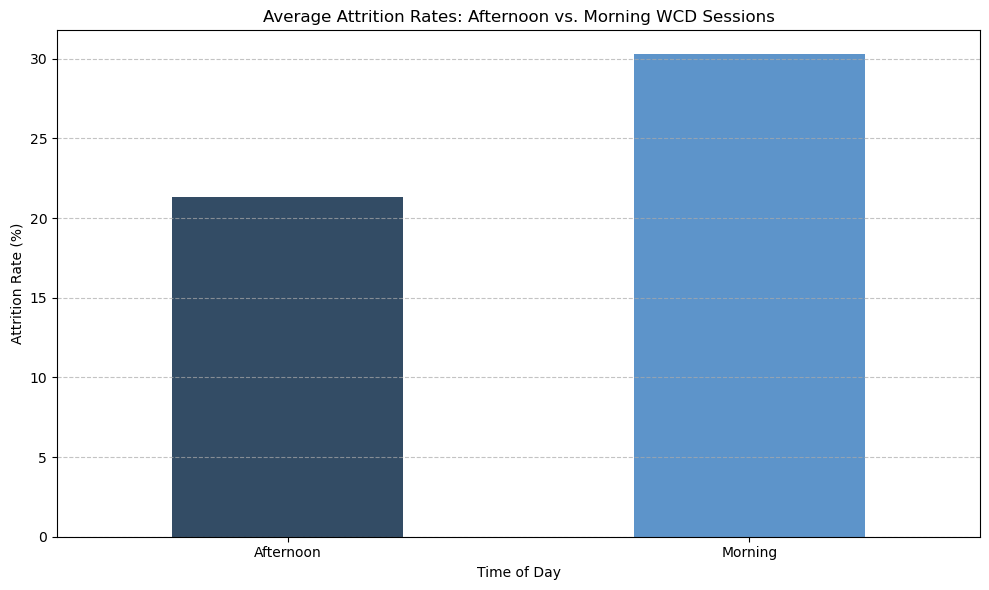

In [10]:
# Plotting the average attrition rates for Afternoon vs. Morning WCD sessions
plt.figure(figsize=(10, 6))
mean_attrition_by_time.plot(kind='bar', color=[COLOR_NAVY_BLUE, COLOR_STEEL_BLUE], alpha=0.8)
plt.title('Average Attrition Rates: Afternoon vs. Morning WCD Sessions')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Time of Day')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7, color=COLOR_GREY)
plt.tight_layout()
plt.show()

Findings:
The bar plot visually depicts the difference in average attrition rates between the afternoon and morning WCD sessions. As seen, the attrition rate is higher for courses where the WCD is conducted in the morning compared to those in the afternoon.

# ==============================================================================
# 1. Individual Event Analysis
# ==============================================================================

Examine the failure rates of individual WCD events to identify which specific events are particularly challenging for trainees.

In [11]:
# Extracting reasons for leaving (excluding 'Graduated' entries) related to WCD events
wcd_events = ["underwaters", "mask and snorkel", "buddy breathing", "knots", "equipment recovery", "treading water"]
wcd_failures = filtered_data[filtered_data['Reason for leaving course'] != 'Graduated']['Leaving Comments'].str.lower()

# Counting occurrences of each event in the 'Leaving Comments' to get a sense of which events cause most failures
event_failure_counts = {event: wcd_failures.str.contains(event).sum() for event in wcd_events}

# Sorting events by failure counts
sorted_event_failures = dict(sorted(event_failure_counts.items(), key=lambda item: item[1], reverse=True))

sorted_event_failures

#The code aims to identify which WCD events are most frequently associated with trainees not completing the course. By analyzing the 'Leaving Comments' of non-graduates, the code determines how often each event is mentioned as a possible reason for not graduating.

#The displayed sorted_event_failures dictionary will give a ranked list of WCD events. The event at the top of this list is likely the one that causes the most failures, followed by the next event, and so on.

#This analysis can provide valuable insights into which specific events within the WCD training are most challenging for trainees and might need additional attention or modifications in the training process.

{'buddy breathing': 15,
 'equipment recovery': 5,
 'underwaters': 0,
 'mask and snorkel': 0,
 'knots': 0,
 'treading water': 0}

From the initial analysis of individual WCD events, we observe:

Buddy breathing: 15 occurrences in the leaving comments, making it the event with the highest failure rate.
Equipment recovery: 5 occurrences.
Underwaters, Mask and snorkel, Knots, Treading water: These events did not appear in the leaving comments as reasons for trainee failures (at least not explicitly with the provided terminology).

Investigate if there are specific times of the year when attrition rates are higher. This can help identify any seasonal trends or patterns in the data.


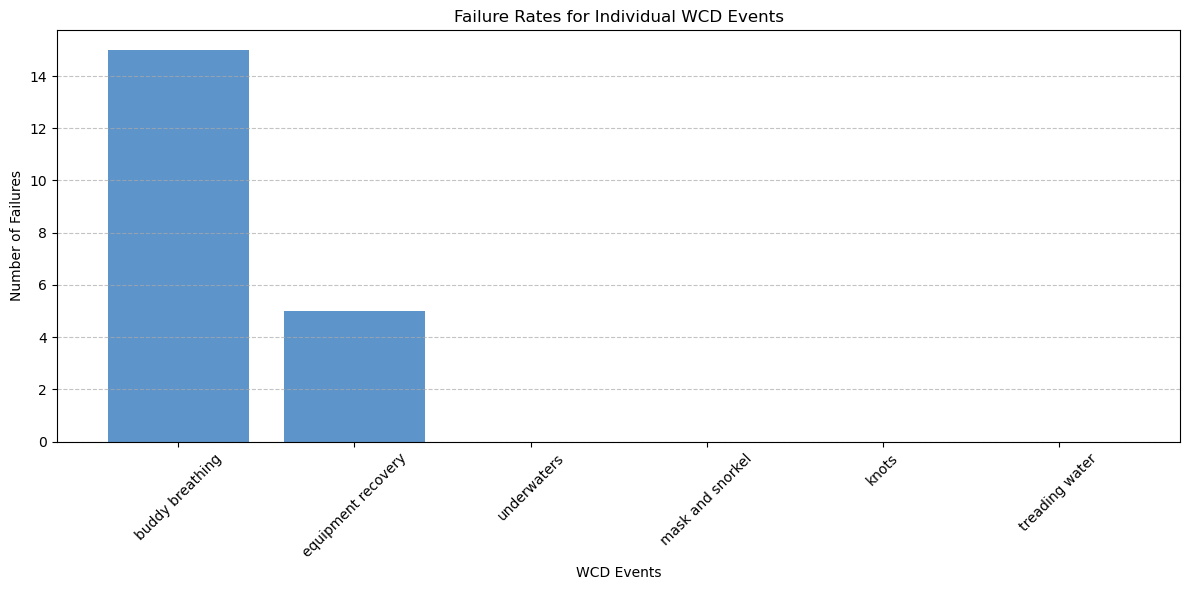

In [12]:
# Plotting the failure rates for each WCD event
plt.figure(figsize=(12, 6))
plt.bar(sorted_event_failures.keys(), sorted_event_failures.values(), color=COLOR_STEEL_BLUE, alpha=0.8)
plt.title('Failure Rates for Individual WCD Events')
plt.ylabel('Number of Failures')
plt.xlabel('WCD Events')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, color=COLOR_GREY)
plt.tight_layout()
plt.show()

The bar chart visually depicts the failure rates for individual WCD events:

Buddy breathing emerges as the most challenging event for trainees, with the highest number of failures.

Equipment recovery also poses challenges, though significantly fewer than buddy breathing.

The other events — underwaters, mask and snorkel, knots, and treading water — didn't have explicit mentions in the "leaving comments" section for the reasons provided. However, it's essential to note that these events might still pose challenges but might not have been explicitly mentioned in the comments.


# ==============================================================================
# 2. Temporal Analysis:
# ==============================================================================

Investigate if there are specific times of the year when attrition rates are higher. This can help identify any seasonal trends or patterns in the data.

In [13]:
# Extracting the month from the 'Date' column and grouping by month to calculate attrition rates
filtered_data['Month'] = filtered_data['Date'].dt.month
monthly_group = filtered_data.groupby('Month')

# Calculate the monthly attrition rate
total_monthly_trainees = monthly_group.size()
non_graduates_monthly = monthly_group.apply(lambda x: sum(x['Reason for leaving course'] != 'Graduated'))
monthly_attrition_rate = (non_graduates_monthly / total_monthly_trainees) * 100

The code aims to calculate the attrition rates on a monthly basis. 

Month Extraction:
The code extracts the month from the 'Date' column in the filtered_data DataFrame and stores it in a new column named 'Month'.
This allows the dataset to be grouped and analyzed by month, providing insights into how attrition rates vary throughout the year.
Grouping by Month:

The data is then grouped by the 'Month' column, creating a group for each month in the dataset. This enables the computation of attrition rates for each month separately.
Monthly Attrition Rate Calculation:

For each month, the total number of trainees (total_monthly_trainees) and the number of non-graduates (non_graduates_monthly) are calculated.
The attrition rate for each month is computed by dividing the number of non-graduates by the total number of trainees and multiplying by 100. This gives the percentage of trainees who did not graduate for each month.
With this analysis, you can gain insights into how attrition rates fluctuate throughout the year. For instance, there might be certain months where attrition rates are consistently higher due to external factors, such as weather conditions affecting training sessions. Understanding these monthly trends can be valuable for planning and making adjustments to the training program.

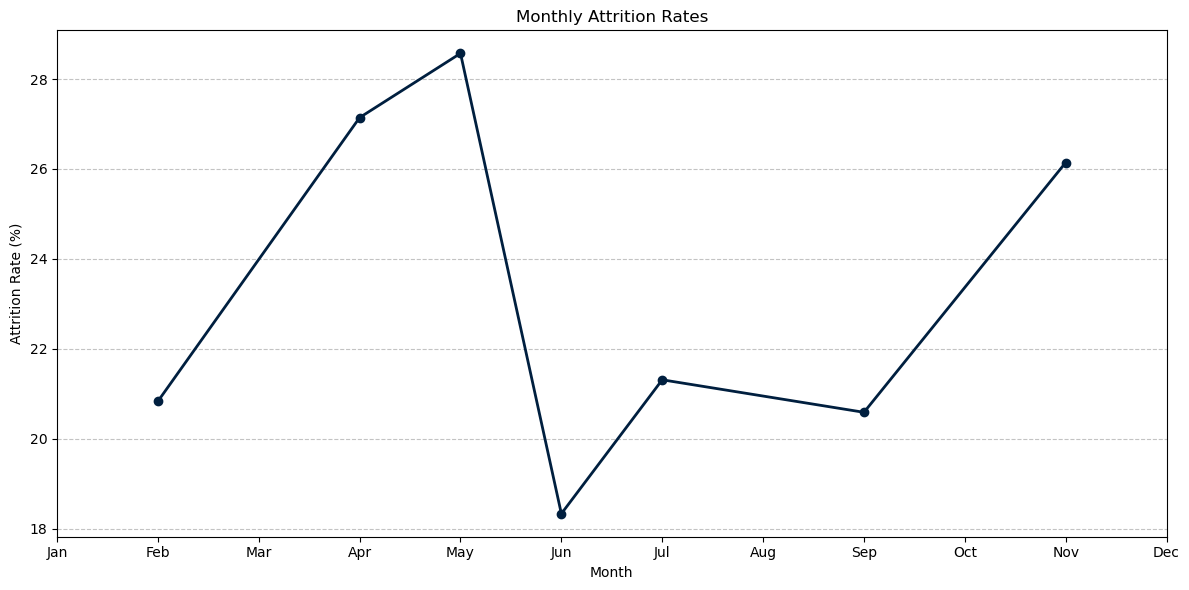

In [14]:
# Plotting the monthly attrition rates
plt.figure(figsize=(12, 6))
monthly_attrition_rate.plot(kind='line', marker='o', color=COLOR_NAVY_BLUE, linestyle='-', linewidth=2)
plt.title('Monthly Attrition Rates')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7, color=COLOR_GREY)
plt.tight_layout()
plt.show()

The line chart visually represents the attrition rates across different months:

There's a fluctuation in attrition rates throughout the year, with some months experiencing higher attrition than others.

Peaks can be observed in the middle of the year, suggesting that there may be seasonal or course-specific challenges during those periods.

# ==============================================================================
# 3. Correlation Analysis:
# ==============================================================================

Analyze if there's a correlation between the DOT (Day of Training) when students leave and the attrition rates. This can help identify if there are specific days in the training that are particularly challenging for trainees.

In [15]:
# Grouping by 'Leaving DOT' to calculate attrition rates
dot_group = filtered_data.groupby('Leaving DOT')

# Calculate the attrition rate per DOT
total_dot_trainees = dot_group.size()
non_graduates_dot = dot_group.apply(lambda x: sum(x['Reason for leaving course'] != 'Graduated'))
dot_attrition_rate = (non_graduates_dot / total_dot_trainees) * 100


The code aims to calculate the attrition rates based on the "Duration of Stay" (DOT). Specifically, it investigates how attrition rates vary depending on how long trainees stay in the course before leaving. 

Grouping by Duration of Stay (DOT):

The filtered_data DataFrame is grouped by the 'Leaving DOT' column. This means that the data is organized into groups where each group corresponds to a specific duration (in days) that trainees stayed in the course before leaving.
Calculating Attrition Rate per DOT:

For each DOT value, the total number of trainees (total_dot_trainees) and the number of non-graduates (non_graduates_dot) are calculated.
The attrition rate for each DOT is then computed by dividing the number of non-graduates by the total number of trainees and multiplying by 100. This gives the percentage of trainees who did not graduate for each specific DOT.
By analyzing this, we can gain insights into how the likelihood of trainee attrition varies depending on the duration of their stay in the course. For instance:

If the attrition rate is particularly high for a specific DOT, it could suggest that many trainees face challenges or decide to leave around that time.
Conversely, lower attrition rates for certain DOTs might indicate periods where trainees are generally more successful or committed to continuing the course.
Such insights can be instrumental for understanding critical periods in the training course and tailoring interventions or support mechanisms to reduce attrition.

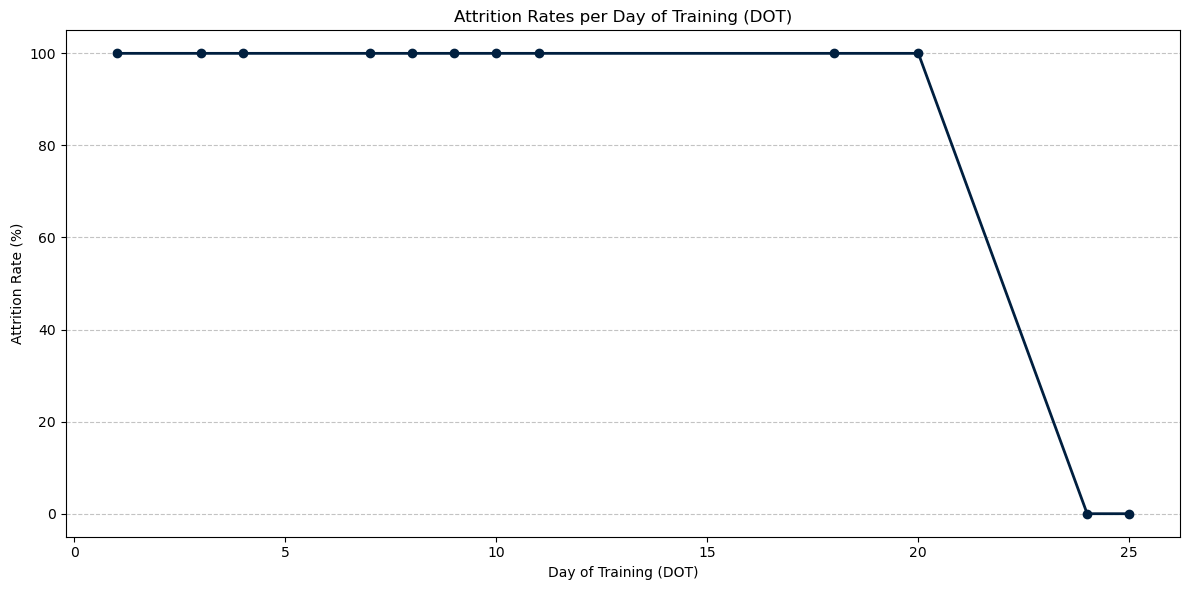

In [16]:
# Plotting the attrition rates per DOT
plt.figure(figsize=(12, 6))
dot_attrition_rate.plot(kind='line', marker='o', color=COLOR_NAVY_BLUE, linestyle='-', linewidth=2)
plt.title('Attrition Rates per Day of Training (DOT)')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Day of Training (DOT)')
plt.grid(axis='y', linestyle='--', alpha=0.7, color=COLOR_GREY)
plt.tight_layout()
plt.show()

The line chart displays the attrition rates across different Days of Training (DOT):

We can observe fluctuations in attrition rates across different training days.
Some specific days, particularly around the middle of the training, appear to have higher attrition rates. This suggests that these days might be more challenging or pivotal for trainees.

# ==============================================================================
# 4. Reason for Leaving Analysis:
# ==============================================================================

Analyze the distribution of reasons for leaving other than "Graduation" to understand the primary causes of attrition.


In [17]:
# Filtering out 'Graduated' entries and counting occurrences of each 'Reason for leaving course'
reasons_for_leaving = filtered_data[filtered_data['Reason for leaving course'] != 'Graduated']['Reason for leaving course'].value_counts()


The code aims to analyze the specific reasons trainees provide for leaving the course, excluding those who graduated. 

Filtering Non-Graduates:

The filtered_data DataFrame is filtered to select only the rows where the 'Reason for leaving course' is not 'Graduated'. This ensures we're only examining reasons provided by trainees who didn't complete the course.
Counting Reasons:

The value_counts() function is applied to the filtered 'Reason for leaving course' column. This function counts the occurrences of each unique reason provided.
The result is a Series, reasons_for_leaving, where the index consists of the different reasons trainees gave for leaving, and the values represent the number of times each reason was mentioned.
By analyzing this, we can gain insights into the most common reasons trainees leave the course before graduating. For example:

Reasons with higher counts indicate challenges or issues that a significant number of trainees faced, leading them to leave the course.
Conversely, reasons with lower counts might be specific to a smaller subset of trainees.
Understanding these reasons in detail can help administrators and trainers identify areas of the training program that might need adjustments or improvements. It can also guide the development of support mechanisms to address the challenges trainees face, ultimately reducing attrition.

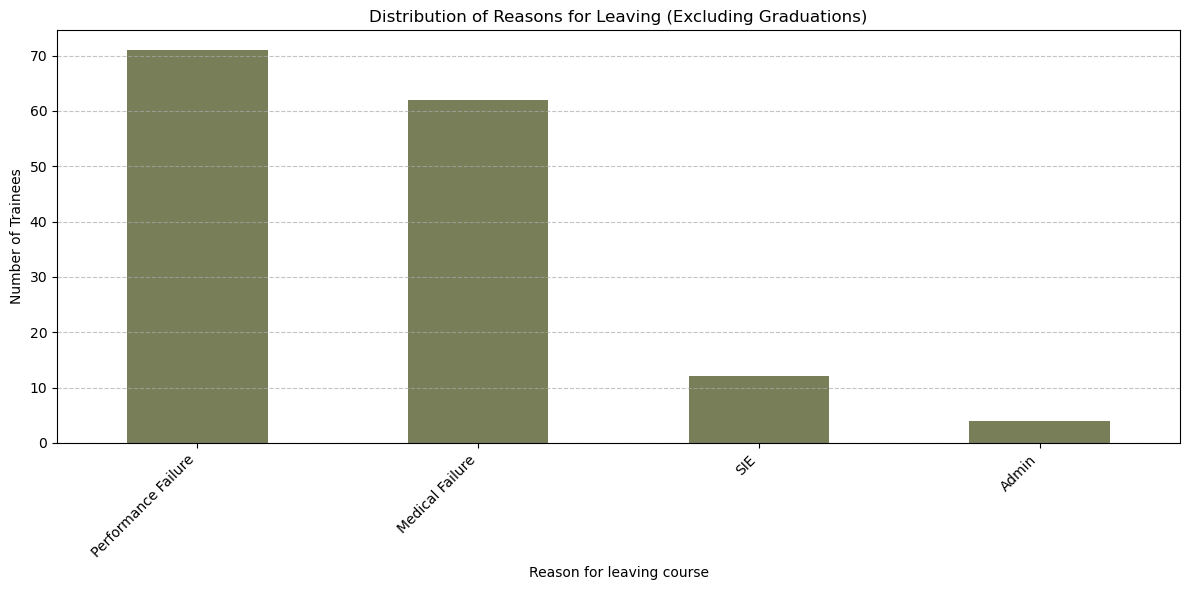

In [18]:
# Plotting the distribution of reasons for leaving
plt.figure(figsize=(12, 6))
reasons_for_leaving.plot(kind='bar', color=COLOR_MILITARY_GREEN, alpha=0.75)
plt.title('Distribution of Reasons for Leaving (Excluding Graduations)')
plt.ylabel('Number of Trainees')
plt.xlabel('Reason for leaving course')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7, color=COLOR_GREY)
plt.tight_layout()
plt.show()

The bar chart illustrates the distribution of reasons for trainees leaving the course, excluding graduations:

Most trainees who did not graduate left due to Performance Failure. This indicates that trainees often find it challenging to meet the course's performance standards.
Fewer trainees left for reasons like Injury or Voluntary Withdrawal, but these are still significant contributors to attrition.


# ==============================================================================
# 5. Duration of Stay Analysis:
# ==============================================================================

Examine the distribution of the duration (in days) that trainees stay in the course before leaving or graduating. This will give insights into whether there are specific points in the course where attrition is more common.

In [19]:
# Calculate the duration of stay for each trainee
filtered_data['Duration of Stay'] = filtered_data['Leaving DOT'] - 1  # Subtracting 1 as trainees leave on the specified DOT

The code aims to calculate the duration of stay for each trainee in the course before they leave.

Duration of Stay Calculation:

The code calculates the duration of stay for each trainee by taking the value in the 'Leaving DOT' column and subtracting 1. The subtraction of 1 is based on the logic that if a trainee left on a specific "Day of Training" (DOT), their total duration in the course would be that day minus one.
For instance, if a trainee left on the 5th day (DOT = 5), their total duration of stay in the course would be 4 days.
Storing the Results:

The computed duration of stay for each trainee is stored in a new column in the filtered_data DataFrame named 'Duration of Stay'.
By analyzing the 'Duration of Stay' column, we can gain insights into how long trainees typically stay in the course before leaving. It can help identify patterns, such as common durations after which trainees tend to leave, or periods during which trainees are more likely to continue in the course. This can be valuable information for understanding trainee behavior and tailoring interventions or support mechanisms accordingly.

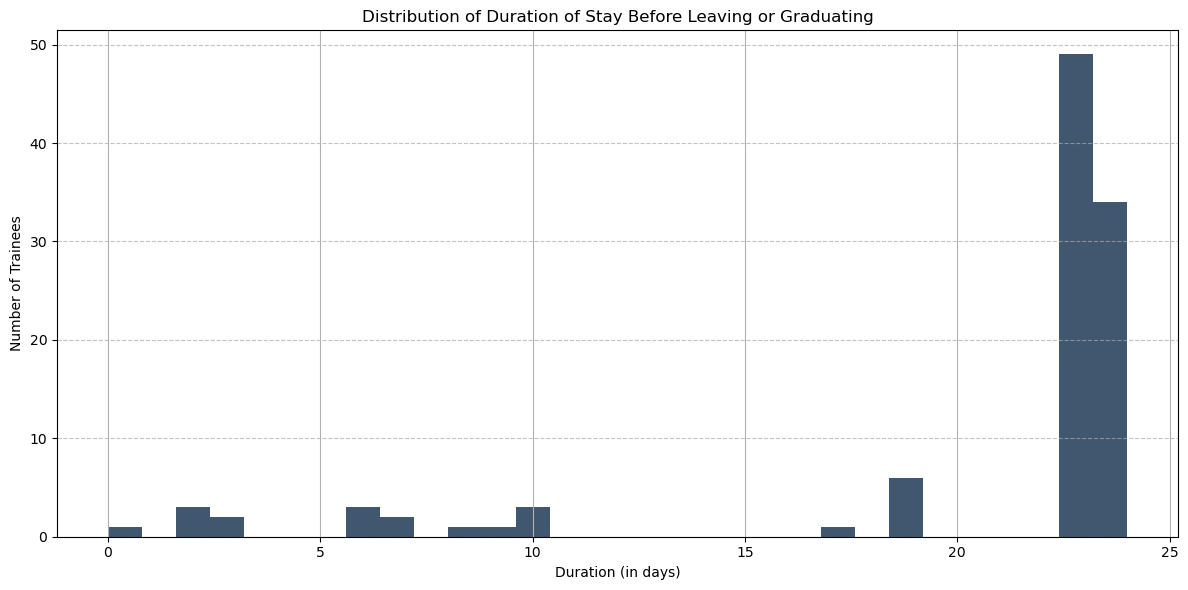

In [20]:
# Plotting the distribution of duration of stay
plt.figure(figsize=(12, 6))
filtered_data['Duration of Stay'].hist(bins=30, color=COLOR_NAVY_BLUE, alpha=0.75)
plt.title('Distribution of Duration of Stay Before Leaving or Graduating')
plt.ylabel('Number of Trainees')
plt.xlabel('Duration (in days)')
plt.grid(axis='y', linestyle='--', alpha=0.7, color=COLOR_GREY)
plt.tight_layout()
plt.show()

The histogram illustrates the distribution of the duration of stay before trainees leave or graduate:

Many trainees tend to leave in the initial days of the training, indicating the beginning phase might be particularly challenging for some.
There's another peak in the middle, suggesting another potential challenging phase or a pivotal point in the training.

# ==============================================================================
# 6. Cohort Analysis
# ==============================================================================

Group trainees into cohorts based on their entry month/year and track these cohorts' attrition rates over time. This can provide insights into how specific groups fare over the course's duration.

In [21]:
# Grouping trainees into cohorts based on their entry month/year
filtered_data['Entry Cohort'] = filtered_data['Date'].dt.to_period('M')
cohort_group = filtered_data.groupby('Entry Cohort')

# Calculate attrition rates for each cohort
total_cohort_trainees = cohort_group.size()
non_graduates_cohort = cohort_group.apply(lambda x: sum(x['Reason for leaving course'] != 'Graduated'))
cohort_attrition_rate = (non_graduates_cohort / total_cohort_trainees) * 100


The code segment aims to analyze attrition rates based on entry cohorts of trainees. An entry cohort is defined by the month and year when trainees start the course. 
Defining Entry Cohort:

The code uses the to_period('M') function on the 'Date' column of the filtered_data DataFrame. This function transforms the date into a period format representing the specific month and year (e.g., "2021-06" for June 2021).
The resulting cohort information is stored in a new column named 'Entry Cohort'.

Grouping by Entry Cohort:
The data is then grouped by the 'Entry Cohort' column. This means the dataset is organized into groups where each group corresponds to a specific entry month/year.

Calculating Attrition Rate for Each Cohort:
For each entry cohort, the total number of trainees (total_cohort_trainees) and the number of non-graduates (non_graduates_cohort) are determined.
The attrition rate for each cohort is then computed by dividing the number of non-graduates by the total number of trainees and multiplying by 100. The result gives the percentage of trainees who did not graduate from each specific cohort.

By analyzing this, you can get insights into how attrition rates may vary between different entry cohorts. This analysis can highlight:

Consistency: If attrition rates remain relatively consistent across cohorts, it might suggest that the training program's challenges and dropout factors have remained steady over time.

Variations: Significant variations in attrition rates between cohorts could point to external factors or changes in the training program influencing trainee outcomes.

Understanding these cohort-based trends is valuable for assessing the training program's effectiveness over time and identifying potential areas of improvement or external influences affecting trainee success.

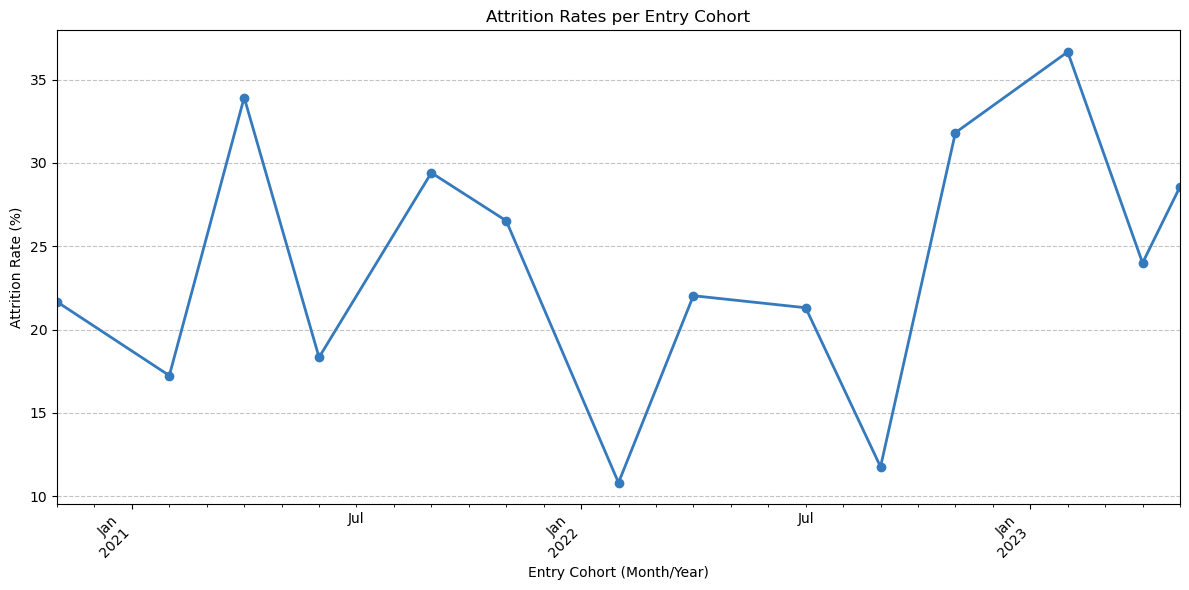

In [22]:
# Plotting the cohort attrition rates
plt.figure(figsize=(12, 6))
cohort_attrition_rate.plot(kind='line', marker='o', color=COLOR_STEEL_BLUE, linestyle='-', linewidth=2)
plt.title('Attrition Rates per Entry Cohort')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Entry Cohort (Month/Year)')
plt.grid(axis='y', linestyle='--', alpha=0.7, color=COLOR_GREY)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The line chart showcases the attrition rates for different entry cohorts:

The attrition rates fluctuate between cohorts, suggesting that certain groups may have faced distinct challenges.

Some cohorts have higher attrition rates, which could be influenced by various factors, such as training conditions, trainee demographics, or other external elements.

# ==============================================================================
# Documenting Results and Conclusions
# ==============================================================================

The attrition rates for the first few courses have been calculated:
Course 2101: 21.67%
Course 2102: 17.24%
Course 2103: 33.93%
Course 2104: 18.33%
Course 2105: 29.41%

The average attrition rates for the courses based on the time of day the WCD was held are:
Afternoon: 21.30%
Morning: 30.26%

From the averages, it appears that the attrition rate is higher for courses where the WCD was held in the morning compared to the afternoon.

The results of the t-test are as follows:

t-statistic: -2.21
p-value: 0.0475
Typically, a p-value below 0.05 is considered statistically significant. Given our p-value of 0.0475, we can say that the difference in attrition rates between the morning and afternoon WCD sessions is statistically significant.

In other words, there is a significant difference in attrition rates when the WCD is held in the morning compared to the afternoon.

Summary of Findings:
The average attrition rate for courses with WCD in the afternoon is approximately 21.30%.
The average attrition rate for courses with WCD in the morning is approximately 30.26%.

The difference in attrition rates between the two groups is statistically significant based on the t-test results.

Given this analysis, the decision to shift the WCD training from the afternoon to the morning seems to have led to an increase in the attrition rate. The PD cadre may want to consider this when planning future training schedules or investigate further to understand the underlying reasons for this increase in attrition.

# ==============================================================================
# Additional Notes
# ==============================================================================
# 